In [736]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

X = [1, 1.6, 2.9, 1.3, 1.3, 2.4, 2.5, 1.9, 1.3, 2.3]
X = [0 - x for x in X]
Y = [1.1, 1.2, 3.1, 2.1, 1.5, 3.2, 3.6, 2.3, 1.4, 2.9]

x_target = np.mean(X)
y_target = np.mean(Y)

R = 16 # distance between centers of motors
r = 40 * 2 / (np.pi * R)


def move(particles, distance, history, e_m, e_sd, f_m, f_sd):
    for p in particles:
        p[0] = p[0] + (distance + random.gauss(e_m, e_sd)) * np.cos(p[2])
        p[1] = p[1] + (distance + random.gauss(e_m, e_sd)) * np.sin(p[2])
        p[2] = p[2] + random.gauss(f_m, f_sd)
    new_particles = [p.copy() for p in particles]
    plt.scatter(np.array(particles)[:,0], np.array(particles)[:,1])
    history.extend(new_particles)
    
def rotate(particles, angle, history, g_m, g_sd):
    for p in particles:
        p[0] = p[0]
        p[1] = p[1]
        p[2] = p[2] + angle + random.gauss(g_m, g_sd)
    new_particles = [p.copy() for p in particles]
    history.extend(new_particles)

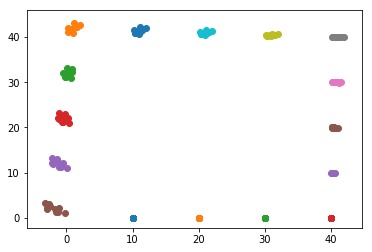

-1.8500000000000003 -1.9576716518805368
2.2399999999999998 2.071775026164299
0.2034425935955617 0.28423242242527846
0.2906697247545552 0.2165363324639747


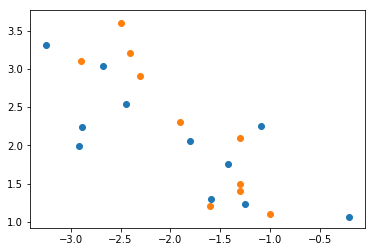

In [748]:
NUMBER_OF_PARTICLES = 11
sd = 0.013
history = []
particles = [[0, 0, 0] for _ in range(NUMBER_OF_PARTICLES)]
for _ in range(4):
    for _ in range(4):
        move(particles, 10, history, 0, sd / r, 0, 0)
    rotate(particles, np.pi / 2, history, -0.025, sd)


history = np.array(history)
data = {'x': [0 for _ in history],
        'y': [0 for _ in history],
        'a': [0 for _ in history]}
data['x'] = history[-NUMBER_OF_PARTICLES:, 0]
data['y'] = history[-NUMBER_OF_PARTICLES:, 1]
data['a'] = history[-NUMBER_OF_PARTICLES:, 2]
plt.show()
print(np.mean(X), np.mean(data['x']))
print(np.mean(Y), np.mean(data['y']))
print(stats.sem(X), stats.sem(data['x']))
print(stats.sem(Y), stats.sem(data['y']))

plt.scatter(data['x'], data['y'])
plt.scatter(X, Y)
plt.show()

In [750]:
# measurements for move by 40cm
G = [39.7, 39.8, 39.9, 39.8, 39.9, 39.85, 39.8, 39.95, 39.85, 39.98]
H = [0.5, 0.45, 0.2, 0.07, -0.02, -0.02, 0.2, 0.25, 0.35, 0.55]

In [753]:
40 * 663 / np.mean(G)

665.4455122575465

In [ ]:
# most recent measurements for end point
D = [-0.8, -0.7, -0.3, -0.15, 0.15, 0.25, 0.3, 0.4, 1.2, 0.1]
E = [-0.5, 0.05, 0.1, -0.12, -0.2, 0.07, 0.3, -0.37, 0.55, 0.8]